# Coursera & IBM Machine Learning - REGRESSION Final Project

## Required

Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.

Sections required in your report:

* Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
* Brief description of the data set you chose and a summary of its attributes.
* Brief summary of data exploration and actions taken for data cleaning and feature engineering.
* Summary of training at least three linear regression models which should be variations that cover using a simple linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.
* A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.
* Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.
* Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.

## Grading will center around 5 main points:

* Does the report include a section describing the data?
* Does the report include a paragraph detailing the main objective(s) of this analysis?  
* Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.
* Does the report include a clear and well presented section with key findings related to the main objective(s) of the analysis?
* Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques? 

## 1. Import Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-whitegrid')
sns.set_style('whitegrid')
plt.rcParams.update({'font.size': 12})

In [2]:
data= pd.read_csv('machine.data', delimiter=',')
data.columns = ['vendor','model','myct','mmin','mmax','cache','chmin','chmax','prp','erp']
print(data.shape)
data.head()

(208, 10)


,vendor,model,myct,mmin,mmax,cache,chmin,chmax,prp,erp
0,amdahl,470v/7,29,8000,32000,32,8,32,269,253
1,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
2,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
3,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
4,amdahl,470v/b,26,8000,32000,64,8,32,318,290


## 2. Data Cleaning

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   vendor  208 non-null    object
 1   model   208 non-null    object
 2   myct    208 non-null    int64 
 3   mmin    208 non-null    int64 
 4   mmax    208 non-null    int64 
 5   cache   208 non-null    int64 
 6   chmin   208 non-null    int64 
 7   chmax   208 non-null    int64 
 8   prp     208 non-null    int64 
 9   erp     208 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.4+ KB


In [4]:
data.isnull().sum()

vendor    0
model     0
myct      0
mmin      0
mmax      0
cache     0
chmin     0
chmax     0
prp       0
erp       0
dtype: int64

In [5]:
data[data.duplicated()== True].sum()

vendor    0.0
model     0.0
myct      0.0
mmin      0.0
mmax      0.0
cache     0.0
chmin     0.0
chmax     0.0
prp       0.0
erp       0.0
dtype: float64

## 3. EDA
### 3.1 Summary Statistics - Part 1

In [6]:
descr_data = data.describe()
descr_data.loc["range"] = descr_data.loc['max'] - descr_data.loc['min']
descr_data

,myct,mmin,mmax,cache,chmin,chmax,prp,erp
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,204.201923,2880.538462,11824.019231,24.096154,4.644231,17.740385,105.177885,98.850962
std,260.833016,3883.839300,11747.916663,37.417999,6.787198,24.913375,161.090223,154.974961
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,49.500000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,111.500000,99.500000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000
range,1483.000000,31936.000000,63936.000000,256.000000,52.000000,176.000000,1144.000000,1223.000000


### 3.2 Vendor Graph

Number of different vendors:  29


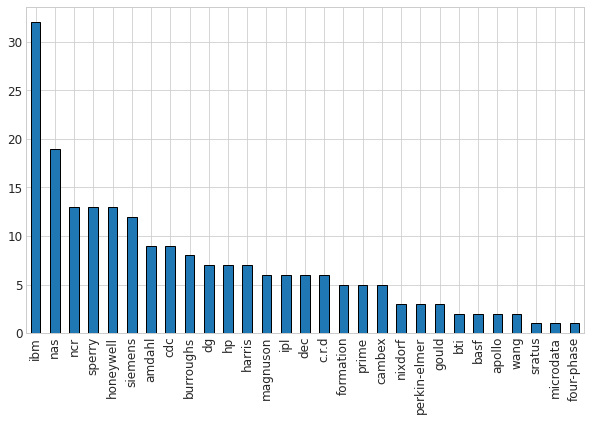

In [7]:
plt.figure(figsize=(10,6))
data['vendor'].value_counts().plot.bar(edgecolor='k');
print('Number of different vendors: ', len(data['vendor'].value_counts()))

In [8]:
data = data.drop(['model','vendor'],axis=1).copy()
data.head()

,myct,mmin,mmax,cache,chmin,chmax,prp,erp
0,29,8000,32000,32,8,32,269,253
1,29,8000,32000,32,8,32,220,253
2,29,8000,32000,32,8,32,172,253
3,29,8000,16000,32,8,16,132,132
4,26,8000,32000,64,8,32,318,290


### 3.3 Feature Engineering

In [9]:
data['cach_mb'] = (data['cache']/1000)                  # cache memory in megabytes
data['ch_avg'] = (((data['chmin']+data['chmax'])/2)+1)  # average num of channels
data['speed'] = 1/np.array((data['myct']))              # machine cycles per nanosecond
data['ch_cap'] = ((data['ch_avg']*data['speed'])*10)    # channel executions per 10 nanosecond
data['mem_avg_mb'] = (((data['mmin']+data['mmax'])/2)/1000) # average memory in megabytes
# data['prp'] = np.log(data['prp'])                     # log normal of y
# data['erp'] = np.log(data['erp'])                     # log normal of y_alt
data.drop(['myct','mmin','mmax','cache','chmin','chmax'],axis=1,inplace=True) # dropping old features
data.head()

,prp,erp,cach_mb,ch_avg,speed,ch_cap,mem_avg_mb
0,269,253,0.032,21.0,0.034483,7.241379,20.0
1,220,253,0.032,21.0,0.034483,7.241379,20.0
2,172,253,0.032,21.0,0.034483,7.241379,20.0
3,132,132,0.032,13.0,0.034483,4.482759,12.0
4,318,290,0.064,21.0,0.038462,8.076923,20.0


### 3.4 Summary Statistics - Part 2 

In [10]:
descr_data = data.describe()
descr_data.loc["range"] = descr_data.loc['max'] - descr_data.loc['min']
descr_data

,prp,erp,cach_mb,ch_avg,speed,ch_cap,mem_avg_mb
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,105.177885,98.850962,0.024096,12.192308,0.013638,2.265251,7.352279
std,161.090223,154.974961,0.037418,14.577016,0.012180,4.220597,7.454068
min,6.000000,15.000000,0.000000,1.000000,0.000667,0.006667,0.064000
25%,27.000000,28.000000,0.000000,4.000000,0.004444,0.225455,2.500000
50%,49.500000,45.000000,0.008000,6.500000,0.009091,0.821429,5.000000
75%,111.500000,99.500000,0.032000,16.250000,0.020000,2.175000,9.000000
max,1150.000000,1238.000000,0.256000,95.000000,0.058824,31.666667,48.000000
range,1144.000000,1223.000000,0.256000,94.000000,0.058157,31.660000,47.936000


### 3.5 Distributions, Boxplots and Outliers

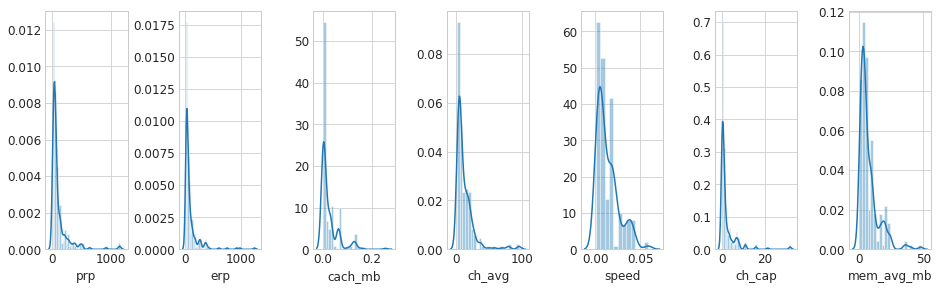

In [11]:
# plot distributions
fig, axs = plt.subplots(ncols=7, nrows=1, figsize=(13, 4))
ind = 0
axs = axs.flatten()
for k,v in data.items():
    sns.distplot(v, ax=axs[ind])
    ind += 1
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5.0)

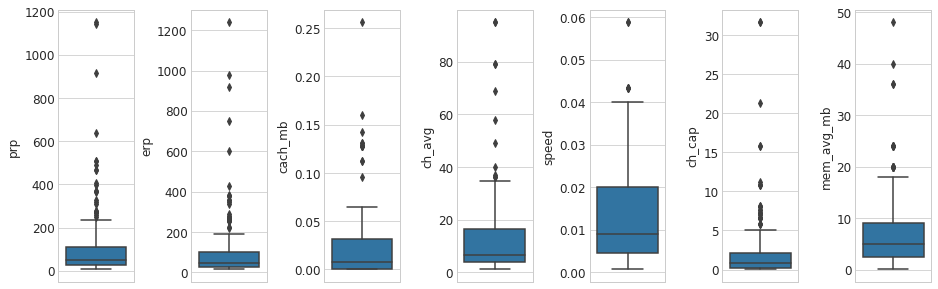

In [12]:
# boxplot with outliers
fig, axs = plt.subplots(ncols=7, nrows=1, figsize=(13, 4))
ind = 0
axs = axs.flatten()
for k,v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[ind])
    ind += 1
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5.0);

### 3.7 Correlation Matrix 

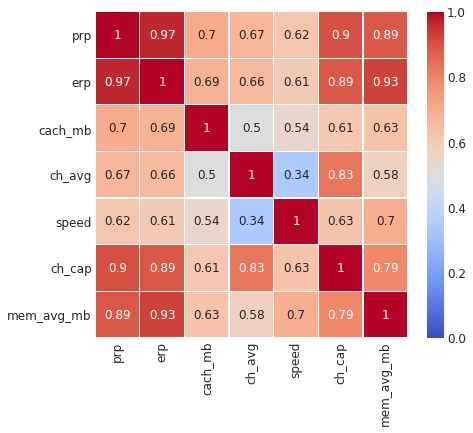

In [13]:
plt.figure(figsize=(7,6))
sns.heatmap(data.corr(), vmin=0.0, vmax=1.0, annot=True, cmap='coolwarm', linewidths=.25);

### 3.8 Benchmark Metrics and Scatter Plot 

In [14]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
def RMSE(y_true,y_pred):
    return np.sqrt(MSE(y_true,y_pred))

In [15]:
# obtain features and target
y = data.prp     # promised performance by vendor
y_alt = data.erp # estimated performance by Ein-Dor & Feldmesser
X = data.drop(['prp','erp'], axis=1)
X =  pd.DataFrame(data=X, dtype=np.float64)

In [16]:
benchmetrics = [r2_score(y,y_alt),MSE(y,y_alt),RMSE(y,y_alt),MAE(y,y_alt)]
print('Benchmark Metrics:')
print('R2: ',benchmetrics[0])
print('MSE: ',benchmetrics[1])
print('RMSE: ',benchmetrics[2])
print('MAE: ',benchmetrics[3])

Benchmark Metrics:
R2:  0.932404166210245
MSE:  1745.6826923076924
RMSE:  41.78136776492235
MAE:  24.442307692307693


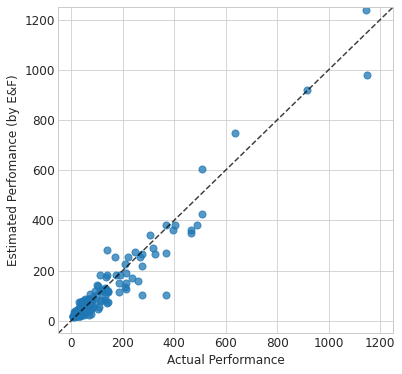

In [17]:
plt.figure(figsize=(6,6))
plt.scatter(y, y_alt, marker='o',alpha=0.75,s=50)
plt.plot(np.linspace(-50,1250,100),np.linspace(-50,1250,100),ls='--',color='k',alpha=0.75)
plt.xlim(-50,1250)
plt.ylim(-50,1250)
plt.xlabel('Actual Performance')
plt.ylabel('Estimated Perfomance (by E&F)');

## 4. Modelling
### 4.1 Linear Regression

In [18]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.pipeline import Pipeline

In [19]:
# initiate k-fold splitting
kf = KFold(shuffle=True, random_state=42, n_splits=4)

In [20]:
from sklearn.model_selection import GridSearchCV
# finding 'best' linear regression
estimator = Pipeline([
        ("polynomial_features", PolynomialFeatures(include_bias=False)),
        ("scaler", StandardScaler()),
        ("linear_regression", LinearRegression())])

params = {'polynomial_features__degree': [1, 2, 3],
}

grid = GridSearchCV(estimator, params, cv=kf)
grid.fit(X, y)
y_pred=grid.predict(X)
best_lin_metrics = [r2_score(y,y_pred),MSE(y,y_pred),RMSE(y,y_pred),MAE(y,y_pred)]
print(grid.best_params_)
print('R2: ',best_lin_metrics[0])
print('MSE: ',best_lin_metrics[1])
print('RMSE: ',best_lin_metrics[2])

{'polynomial_features__degree': 1}
R2:  0.9316146519536017
MSE:  1766.0721349091289
RMSE:  42.02466103264997


### 4.2 Lasso Regression

In [21]:
# find best lasso
estimator = Pipeline([
        ("polynomial_features", PolynomialFeatures(include_bias=False)),
        ("scaler", StandardScaler()),
        ("lasso_regression", Lasso(max_iter=10e6))])

params = {
    'polynomial_features__degree': [1, 2, 3],
    'lasso_regression__alpha': np.geomspace(0.1,100,4)
}

grid = GridSearchCV(estimator, params, cv=kf)
grid.fit(X, y)
y_pred=grid.predict(X)
best_lasso_metrics = [r2_score(y,y_pred),MSE(y,y_pred),RMSE(y,y_pred),MAE(y,y_pred)]

print(grid.best_params_)
print('R2: ',best_lasso_metrics[0])
print('MSE: ',best_lasso_metrics[1])
print('RMSE: ',best_lasso_metrics[2])

{'lasso_regression__alpha': 1.0, 'polynomial_features__degree': 2}
R2:  0.9554957011895332
MSE:  1149.336871978887
RMSE:  33.901871216481354


### 4.3 Ridge Regression

In [22]:
# find best ridge
estimator = Pipeline([
        ("polynomial_features", PolynomialFeatures(include_bias=False)),
        ("scaler", StandardScaler()),
        ("ridge_regression", Ridge())])

params = {
    'polynomial_features__degree': [1, 2, 3],
    'ridge_regression__alpha': np.geomspace(0.1,100,4)
}

grid = GridSearchCV(estimator, params, cv=kf)
grid.fit(X, y)
y_pred=grid.predict(X)
best_ridge_metrics = [r2_score(y,y_pred),MSE(y,y_pred),RMSE(y,y_pred),MAE(y,y_pred)]

print(grid.best_params_)
print('R2: ',best_ridge_metrics[0])
print('MSE: ',best_ridge_metrics[1])
print('RMSE: ',best_ridge_metrics[2])

{'polynomial_features__degree': 2, 'ridge_regression__alpha': 10.0}
R2:  0.9558880559698738
MSE:  1139.204192035695
RMSE:  33.752099075993705


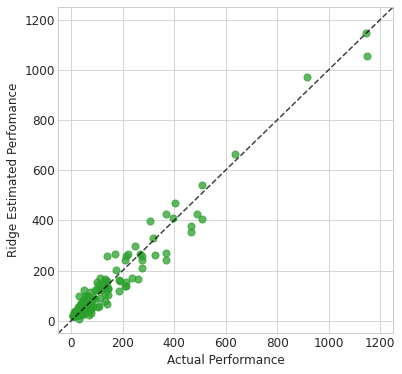

In [23]:
plt.figure(figsize=(6,6))
plt.scatter(y, y_pred, marker='o',alpha=0.75,s=50,color='tab:green')
plt.plot(np.linspace(-50,1250,100),np.linspace(-50,1250,100),ls='--',color='k',alpha=0.75)
plt.xlim(-50,1250)
plt.ylim(-50,1250)
plt.xlabel('Actual Performance')
plt.ylabel('Ridge Estimated Perfomance');

### 4.4 ElasticNet Regression

In [24]:
# find best ElasticNet
estimator = Pipeline([
        ("polynomial_features", PolynomialFeatures(include_bias=False)),
        ("scaler", StandardScaler()),
        ("elastic_net", ElasticNet(max_iter=10e6))])

params = {
    'polynomial_features__degree': [1, 2, 3],
    'elastic_net__alpha': np.geomspace(0.01,100,5),
    'elastic_net__l1_ratio': np.linspace(0.1,0.9,9)
}

grid = GridSearchCV(estimator, params, cv=kf)
grid.fit(X, y)
y_pred=grid.predict(X)
best_elastic_metrics = [r2_score(y,y_pred),MSE(y,y_pred),RMSE(y,y_pred),MAE(y,y_pred)]

print(grid.best_params_)
print('R2: ',best_elastic_metrics[0])
print('MSE: ',best_elastic_metrics[1])
print('RMSE: ',best_elastic_metrics[2])

{'elastic_net__alpha': 0.1, 'elastic_net__l1_ratio': 0.1, 'polynomial_features__degree': 2}
R2:  0.9539449287297141
MSE:  1189.3860361216598
RMSE:  34.487476511360754


## 5. Model Evaluation

In [25]:
# model evaluation table
model_eval= pd.DataFrame(benchmetrics, index=['R^2','MSE','RMSE','MAE'])
model_eval.columns = ['Benchmark Metrics']
model_eval.insert(loc=1, column='Linear Regression', value=best_lin_metrics)
model_eval.insert(loc=2, column='Lasso Regression', value=best_lasso_metrics)
model_eval.insert(loc=3, column='Ridge Regression', value=best_ridge_metrics)
model_eval.insert(loc=4, column='Elastic Net Regression', value=best_elastic_metrics)
model_eval

,Benchmark Metrics,Linear Regression,Lasso Regression,Ridge Regression,Elastic Net Regression
R^2,0.932404,0.931615,0.955496,0.955888,0.953945
MSE,1745.682692,1766.072135,1149.336872,1139.204192,1189.386036
RMSE,41.781368,42.024661,33.901871,33.752099,34.487477
MAE,24.442308,28.229341,23.057861,22.505444,23.064060
